In [1]:
import numpy as np
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
import os

In [2]:
def compute_global_mean(ds):
    wts = ds.profile_weight/ds.profile_weight.sum()
    return(ds.weighted(wts).mean(["site"]))

In [3]:
#copy directory here
os.chdir('/Users/emmalayton/Desktop/senior_thesis/RFMIP-IRF_intake_catalogue')

In [6]:
from intake import open_catalog
cat = open_catalog(os.getcwd() + '/main.yml')

In [4]:
extrainfo = xr.open_dataset(os.getcwd() + '/multiple_input4MIPs_radiation_RFMIP_UColorado-RFMIP-1-2_none.nc').to_dataframe()

In [7]:
xr.concat([compute_global_mean(cat.parameterized.RRTMG.p1f1[f].to_dask()) for f in ["rlu", "rld", "rsu", "rsd"]], 
          dim="field", data_vars = "different")
benchmark = xr.concat([compute_global_mean(cat.benchmark.LBLRTM.p1f1[f].to_dask()) 
                               for f in ["rlu", "rld", "rsu", "rsd"]], 
                               dim="field", data_vars = "different")
benchmark = benchmark.assign_coords(expt=extrainfo['expt_label'].unique())

/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'rlu' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'rld' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'rsu' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'rsd' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/co

In [8]:
gbms = {}
for m in list(cat.parameterized):
    print("Trying model ", m)
    for r in list(cat.parameterized[m]):
        print(" Realization ", r)
        gbms[f'{m}_{r}'] = xr.concat([compute_global_mean(cat.parameterized[m][r][f].to_dask()) 
                                for f in ["rlu","rld","rsu","rsd"]], 
                                dim="field", data_vars = "different")
        
gbms = {k: gbms[k].assign_coords(expt=extrainfo['expt_label'].unique()) for k in gbms.keys()}

Trying model  CanESM5
 Realization  p2f2
Trying model  GISS_E2
 Realization  p1f1
Trying model  GISS_E3
 Realization  p1f1
Trying model  HadGEM3
 Realization  p1f2


/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'rlu' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'rld' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'rsu' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'rsd' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/co

 Realization  p1f3


/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'rsu' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'rsd' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


Trying model  MIROC6
 Realization  p1f1
Trying model  GFDL
 Realization  p1f2
Trying model  RRTMG
 Realization  p1f1
Trying model  RTE_RRTMGP
 Realization  p1f1


/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'rlu' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'rld' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'rsu' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Applications/anaconda3/envs/RFMIP/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'rsd' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [9]:
#calculate benchmark lw and sw flux
benchmark = benchmark.assign(rln=benchmark.data_vars['rld']-benchmark.data_vars['rlu'])
benchmark = benchmark.assign(rsn=benchmark.data_vars['rsd']-benchmark.data_vars['rsu'])
#calculate parameterized lw and sw flux
gbms = {k: gbms[k].assign(rln=gbms[k].data_vars['rld']-gbms[k].data_vars['rlu']) for k in gbms.keys()}
gbms = {k: gbms[k].assign(rsn=gbms[k].data_vars['rsd']-gbms[k].data_vars['rsu']) for k in gbms.keys()}

In [10]:
gbmforcing = gbms.copy()
for m in list(gbms.keys()):
    gbmforcing[m] = gbmforcing[m] - gbmforcing[m].isel(expt=0)

In [11]:
gbmforcing_b = benchmark.copy()
gbmforcing_b = gbmforcing_b - gbmforcing_b.isel(expt=0)

In [12]:
gbme = {k: (gbmforcing[k]-gbmforcing_b) for k in gbmforcing.keys()}

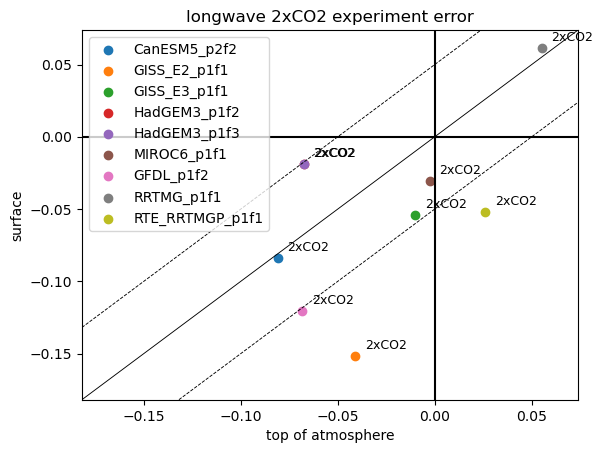

In [32]:
fig, ax = plt.subplots()
selected_experiments = ['2xCO2']
squaremax = 0
squaremin = 0
for m in list(gbme.keys()):
    plt.scatter(gbme[m].data_vars["rln"][:,0].sel(expt=selected_experiments),gbme[m].data_vars["rln"][:,60].sel(expt=selected_experiments))
    newmax = np.concatenate((gbme[m].data_vars["rln"][:,0].sel(expt=selected_experiments), gbme[m].data_vars["rln"][:,60].sel(expt=selected_experiments))).max()
    newmin = np.concatenate((gbme[m].data_vars["rln"][:,0].sel(expt=selected_experiments), gbme[m].data_vars["rln"][:,60].sel(expt=selected_experiments))).min()

#make the plots square
    if newmax>squaremax:
        squaremax = newmax
    if newmin<squaremin:
        squaremin = newmin
    for i in range(len(gbme[m].expt)):
        if gbme[m].expt[i].values in selected_experiments:
            plt.text(gbme[m].data_vars["rln"][i,0]+0.005,gbme[m].data_vars["rln"][i,60]+0.005, gbme[m].expt[i].values, fontsize=9)
plt.xlim(1.2*squaremin,1.2*squaremax)
plt.ylim(1.2*squaremin,1.2*squaremax)

#plot isolines
x = np.linspace(1.2*squaremin,1.2*squaremax, 1000)
plt.plot(x,x,'k',linestyle='solid', linewidth=0.65)
plt.plot(x,x+0.05,'k',linestyle='dashed', linewidth=0.65)
plt.plot(x,x-0.05,'k',linestyle='dashed', linewidth=0.65)

plt.xlabel("top of atmosphere")
plt.ylabel("surface")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.legend(list(gbme.keys()))
plt.title("longwave 2xCO2 experiment error")
plt.show()

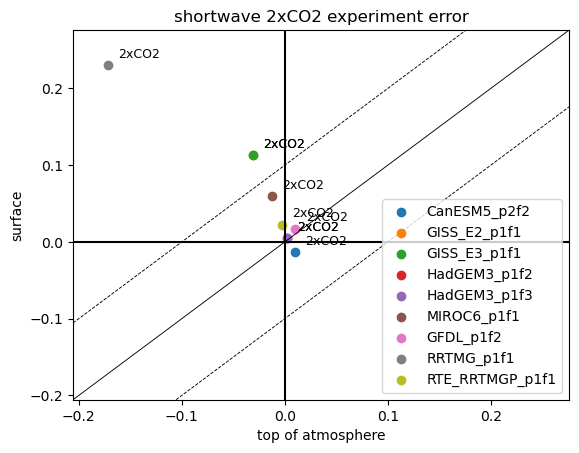

In [33]:
fig, ax = plt.subplots()
squaremax = 0
squaremin = 0
selected_experiments = ['2xCO2']
for m in list(gbme.keys()):
    plt.scatter(gbme[m].data_vars["rsn"][:,0].sel(expt=selected_experiments),gbme[m].data_vars["rsn"][:,60].sel(expt=selected_experiments))
    newmax = np.concatenate((gbme[m].data_vars["rsn"][:,0].sel(expt=selected_experiments), gbme[m].data_vars["rsn"][:,60].sel(expt=selected_experiments))).max()
    newmin = np.concatenate((gbme[m].data_vars["rsn"][:,0].sel(expt=selected_experiments), gbme[m].data_vars["rsn"][:,60].sel(expt=selected_experiments))).min()
    if newmax>squaremax:
        squaremax = newmax
    if newmin<squaremin:
        squaremin = newmin
    for i in range(len(gbme[m].expt)):
        if gbme[m].expt[i].values in selected_experiments:
            plt.text(gbme[m].data_vars["rsn"][i,0]+0.01,gbme[m].data_vars["rsn"][i,60]+0.01, gbme[m].expt[i].values, fontsize=9)
plt.xlim(1.2*squaremin,1.2*squaremax)
plt.ylim(1.2*squaremin,1.2*squaremax)     

#plot isolines
x = np.linspace(1.2*squaremin,1.2*squaremax, 1000)
plt.plot(x,x,'k',linestyle='solid', linewidth=0.65)
plt.plot(x,x+0.1,'k',linestyle='dashed', linewidth=0.65)
plt.plot(x,x-0.1,'k',linestyle='dashed', linewidth=0.65)


plt.xlabel("top of atmosphere")
plt.ylabel("surface")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.legend([k for k in gbme.keys()])
plt.title("shortwave 2xCO2 experiment error")
plt.show()

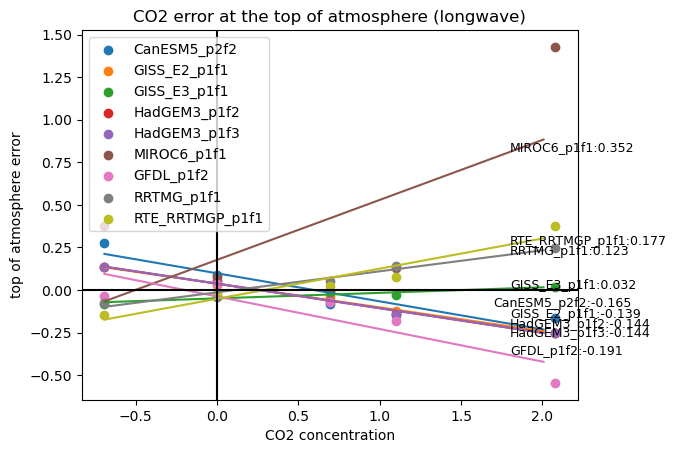

In [15]:
#vertical structure of O3
fig, ax = plt.subplots()
x = 1.8
#y = gbme[m].data_vars["rln"].sel(expt=['0.5xCO2', 'PI CO2', '2xCO2', '3xCO2', '8xCO2'])
for m in list(gbme.keys()):
    plt.scatter(np.log([0.5, 1, 2, 3, 8]), gbme[m].data_vars["rln"].sel(expt=['0.5xCO2', 'PI CO2', '2xCO2', '3xCO2', '8xCO2'], level=0))
plt.xlabel("CO2 concentration")
plt.legend(list(gbme.keys()))
for m in list(gbme.keys()):
    f, b = np.polyfit(np.log([0.5, 1, 2, 3, 8]), gbme[m].data_vars["rln"].sel(expt=['0.5xCO2', 'PI CO2', '2xCO2', '3xCO2', '8xCO2'], level=0), 1)
    plt.plot(np.arange(np.log(0.5),np.log(8),0.1), np.arange(np.log(0.5),np.log(8),0.1)*f + b)
    if "CanESM5_p2f2" in m:
        plt.text(x-0.1, x*f+b+0.1, m + ":" + str('%.3f'%f), fontsize=9)
    elif "GISS_E2_p1f1" in m:
        plt.text(x, x*f+b+0.05, m + ":" + str('%.3f'%f), fontsize=9)
    elif "HadGEM3_p1f3" in m:
        plt.text(x, x*f+b-0.05, m + ":" + str('%.3f'%f), fontsize=9)
    else:
        plt.text(x, x*f+b, m + ":" + str('%.3f'%f), fontsize=9)
        
plt.ylabel("top of atmosphere error")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title("CO2 error at the top of atmosphere (longwave)")
plt.show()
#draw straight lines through each

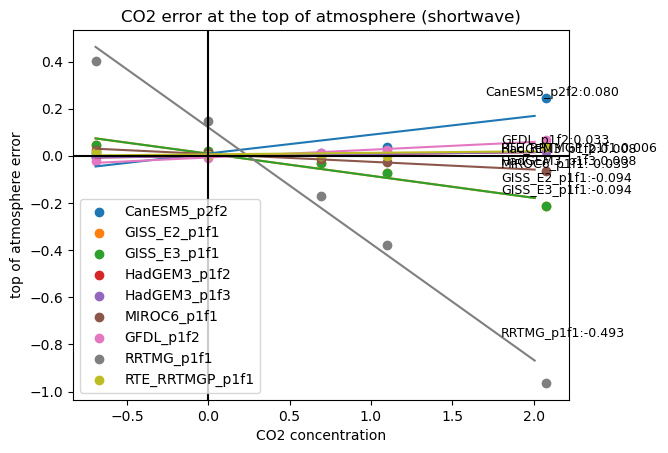

In [16]:
#vertical structure of O3
fig, ax = plt.subplots()
x = 1.8
#y = gbme[m].data_vars["rln"].sel(expt=['0.5xCO2', 'PI CO2', '2xCO2', '3xCO2', '8xCO2'])
for m in list(gbme.keys()):
    plt.scatter(np.log([0.5, 1, 2, 3, 8]), gbme[m].data_vars["rsn"].sel(expt=['0.5xCO2', 'PI CO2', '2xCO2', '3xCO2', '8xCO2'], level=0))
plt.xlabel("CO2 concentration")
plt.legend(list(gbme.keys()))
for m in list(gbme.keys()):
    f, b = np.polyfit(np.log([0.5, 1, 2, 3, 8]), gbme[m].data_vars["rsn"].sel(expt=['0.5xCO2', 'PI CO2', '2xCO2', '3xCO2', '8xCO2'], level=0), 1)
    plt.plot(np.arange(np.log(0.5),np.log(8),0.1), np.arange(np.log(0.5),np.log(8),0.1)*f + b)
    if "CanESM5_p2f2" in m:
        plt.text(x-0.1, x*f+b+0.1, m + ":" + str('%.3f'%f), fontsize=9)
    elif "GISS_E2_p1f1" in m:
        plt.text(x, x*f+b+0.05, m + ":" + str('%.3f'%f), fontsize=9)
    elif "HadGEM3_p1f3" in m:
        plt.text(x, x*f+b-0.05, m + ":" + str('%.3f'%f), fontsize=9)
    else:
        plt.text(x, x*f+b, m + ":" + str('%.3f'%f), fontsize=9)
        
plt.ylabel("top of atmosphere error")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title("CO2 error at the top of atmosphere (shortwave)")
plt.show()
#draw straight lines through each